## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 1

**Student Name:**    Siu Pui Cheung

**Student ID:**     123079

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a written report explaining your results at the **Assignment 1** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

Original photo height: 1500 pixels
Statue photo height: 990 pixels


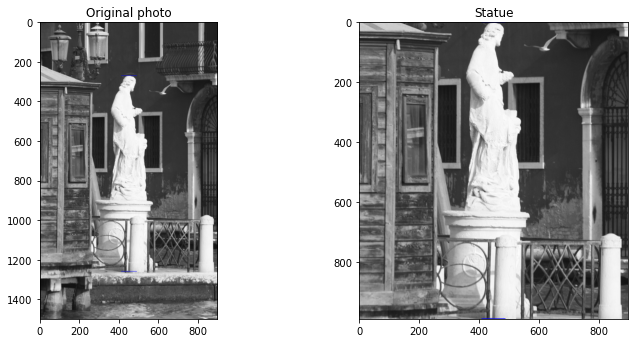

In [2]:
rootpath='./'
img_1= cv2.imread(os.path.join(rootpath, "Asst1_1_image.png"))
statue= cv2.imread(os.path.join(rootpath, "statue.png"))
plt.subplots(figsize=(12,12)) 
plt.subplot(2, 2, 1)
plt.title('Original photo')
plt.imshow(img_1)
plt.subplot(2, 2, 2)
plt.title('Statue')
plt.imshow(statue)

origianl = img_1.shape[0]
statue = statue.shape[0]
print('Original photo height:', origianl, 'pixels')
print('Statue photo height:', statue, 'pixels')

In [3]:
focal_length = 0.194
sensor_height = 0.01632
z = 56.35
# formula = Focal length = z*Sensor height / photo height
photo_height = (z*sensor_height / focal_length)
print('Photo height: ', round(photo_height,2), 'm')

statue_photo_ratio = statue / origianl
print('Statue photo ratio: ', statue_photo_ratio)
statue_height = photo_height * statue_photo_ratio
print('Statue height: ', round(statue_height,2), 'm')

Photo height:  4.74 m
Statue photo ratio:  0.66
Statue height:  3.13 m


### 2. Thinking with filters

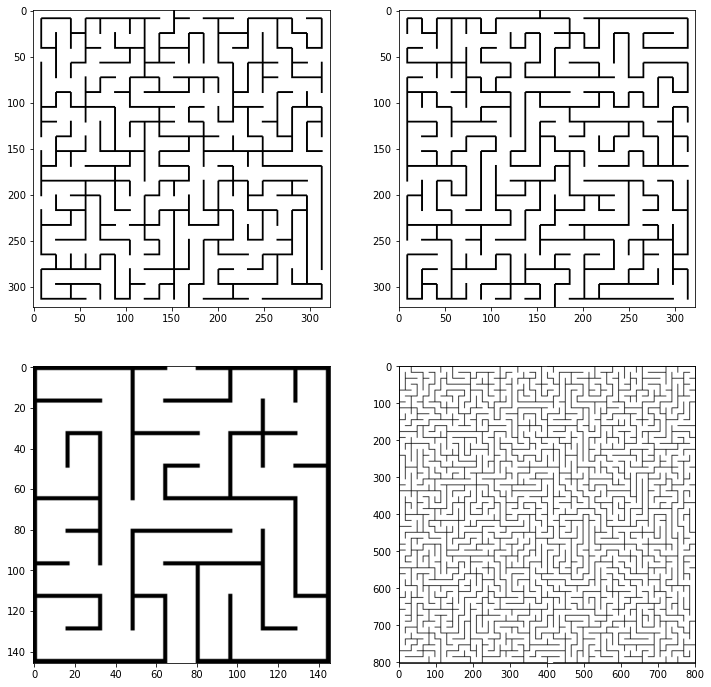

In [4]:
maze_1 = cv2.imread(os.path.join(rootpath, "Asst1_2_maze1.png"))
maze_2 = cv2.imread(os.path.join(rootpath, "Asst1_2_maze2.png"))
maze_3 = cv2.imread(os.path.join(rootpath, "maze3.png"))
maze_4 = cv2.imread(os.path.join(rootpath, "maze4.png"))
plt.subplots(figsize=(12,12)) 
plt.subplot(2, 2, 1)
plt.imshow(maze_1)
plt.subplot(2, 2, 2)
plt.imshow(maze_2)
plt.subplot(2, 2, 3)
plt.imshow(maze_3)
plt.subplot(2, 2, 4)
plt.imshow(maze_4)

In [74]:
def filters(src):
    # set the sobel kernel matrices, x is horizontal (left & right), y is vertical (top and bottom)
    sobel_kernel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
    sobel_kernel_x2 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    sobel_kernel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    sobel_kernel_y2 = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    sobel_out_x = cv2.filter2D(src,-1,sobel_kernel_x)
    sobel_out_x2 = cv2.filter2D(src,-1,sobel_kernel_x2)
    sobel_out_y = cv2.filter2D(src,-1,sobel_kernel_y)
    sobel_out_y2 = cv2.filter2D(src,-1,sobel_kernel_y2)
    num_rows, num_cols = src.shape[:2] 
    # matrices for moving images
    matrix_1 = np.float32([[1,0,0], [0,1,-2]])  
    matrix_2 = np.float32([[1,0,0], [0,1,2]])  
    matrix_3 = np.float32([[1,0,-2], [0,1,0]])  
    matrix_4 = np.float32([[1,0,-2], [0,1,2]])
    matrix_5 = np.float32([[1,0,2], [0,1,0]]) 
    matrix_6 = np.float32([[1,0,4], [0,1,0]]) 
    matrix_7 = np.float32([[1,0,-4], [0,1,0]]) 
    matrix_8 = np.float32([[1,0,0], [0,1,-4]]) 
    matrix_9 = np.float32([[1,0,0], [0,1,4]]) 
    # create images using sobel, a1 used as the baseline and other images are move to the same location
    x2 = cv2.bitwise_and(sobel_out_x, sobel_out_y2)
    x3 = cv2.bitwise_and(sobel_out_x2, sobel_out_y)
    x4 = cv2.bitwise_and(sobel_out_x2, sobel_out_y2)
    a1 = cv2.bitwise_and(sobel_out_x, sobel_out_y)
    a2 = cv2.warpAffine(x2, matrix_2, (num_cols, num_rows))
    a3 = cv2.warpAffine(x3, matrix_3, (num_cols, num_rows))
    a4 = cv2.warpAffine(x4, matrix_4, (num_cols, num_rows))
    # create images of intersections and dead ends
    left = cv2.bitwise_and(a1,a2)
    right = cv2.bitwise_and(a3,a4)
    up = cv2.bitwise_and(a2,a4)
    down = cv2.bitwise_and(a1,a3)
    line = sobel_out_x + sobel_out_y + sobel_out_x2 + sobel_out_y2
    # change the location with certain pattern
    left_l = cv2.warpAffine(left, matrix_3, (num_cols, num_rows))
    right_r = cv2.warpAffine(right, matrix_6, (num_cols, num_rows))
    up_u = cv2.warpAffine(up, matrix_8, (num_cols, num_rows))
    down_d = cv2.warpAffine(down, matrix_2, (num_cols, num_rows))
    #  remove dead ends in the images
    left_is = cv2.bitwise_and(line,left_l)
    right_is = cv2.bitwise_and(line,right_r)
    up_is = cv2.bitwise_and(line,up_u)
    down_is = cv2.bitwise_and(line,down_d)
    # move images back to the original place
    left_is = cv2.warpAffine(left_is, matrix_5, (num_cols, num_rows))
    right_is = cv2.warpAffine(right_is, matrix_7, (num_cols, num_rows))
    up_is = cv2.warpAffine(up_is, matrix_9, (num_cols, num_rows))
    down_is = cv2.warpAffine(down_is, matrix_1, (num_cols, num_rows))

    # find the dead end using xor
    left_de=cv2.bitwise_xor(left, left_is)
    right_de=cv2.bitwise_xor(right, right_is)
    up_de=cv2.bitwise_xor(up, up_is)
    down_de=cv2.bitwise_xor(down, down_is)
    # color the images
    left_is[np.where((left_is==[255,255,255]).all(axis=2))] = [255,0,0]
    right_is[np.where((right_is==[255,255,255]).all(axis=2))] = [255,0,0]
    up_is[np.where((up_is==[255,255,255]).all(axis=2))] = [255,0,0]
    down_is[np.where((down_is==[255,255,255]).all(axis=2))] = [255,0,0]
    left_de[np.where((left_de==[255,255,255]).all(axis=2))] = [0,0,255]
    right_de[np.where((right_de==[255,255,255]).all(axis=2))] = [0,0,255]
    up_de[np.where((up_de==[255,255,255]).all(axis=2))] = [0,0,255]
    down_de[np.where((down_de==[255,255,255]).all(axis=2))] = [0,0,255]
    #combine the images
    intersection = left_is + right_is + up_is + down_is
    dead_end = left_de + right_de + up_de + down_de
    combine = intersection + dead_end
    combine[np.where((combine==[0,0,0]).all(axis=2))] = [255,255,255]
    # srhink the size by half with interpolation so that each color can be counted as 1 pixel
    rz_is= cv2.resize(intersection, (num_cols//2, num_rows//2), interpolation = cv2.INTER_NEAREST)
    rz_de= cv2.resize(dead_end, (num_cols//2, num_rows//2), interpolation = cv2.INTER_NEAREST)
    # calcuate the number of intersections and dead ends
    is_num, de_num = np.count_nonzero(rz_is), np.count_nonzero(rz_de)
    plt.axis('off')
    plt.title(f'')
    plt.imshow(cv2.addWeighted(src, 0.5,combine, 0.7, 0))

    return print("The number of intersections is", is_num, "\nThe number of dead ends is", de_num)

The number of intersections is 87 
The number of dead ends is 98


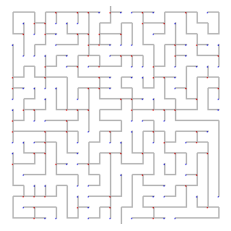

In [75]:
filters(maze_1)

The number of intersections is 71 
The number of dead ends is 74


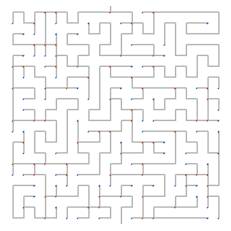

In [76]:
filters(maze_2)

The number of intersections is 17 
The number of dead ends is 21


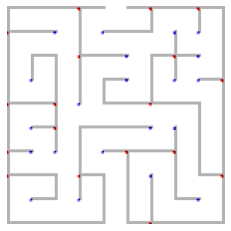

In [77]:
filters(maze_3)

The number of intersections is 543 
The number of dead ends is 593


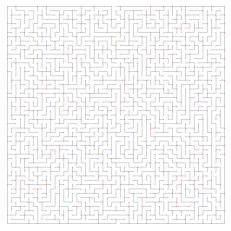

In [78]:
filters(maze_4)